In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import seaborn as sns

In [3]:
baru = pd.read_csv(r"..\data\data-with-outlier\data_dbscan.csv", delimiter =",")
baru.Cluster.value_counts()

Cluster
 0    726
-1     15
 2      4
 1      3
Name: count, dtype: int64

dataset dbscan imbalanced parah banget jadi jangan di-train

In [4]:
data = pd.read_csv(r"..\data\data-with-outlier\data_kmeans.csv", delimiter =",")
data

,Months,Frequencies,Monetary,NumMonth,isDonate,Cluster
0,2.0,50.0,12500.0,98,1,0
1,0.0,13.0,3250.0,28,1,2
2,1.0,16.0,4000.0,35,1,2
3,2.0,20.0,5000.0,45,1,2
4,1.0,24.0,6000.0,77,0,0
...,...,...,...,...,...,...
743,23.0,2.0,500.0,38,0,3
744,21.0,2.0,500.0,52,0,3
745,23.0,3.0,750.0,62,0,3
746,39.0,1.0,250.0,39,0,3


In [5]:
data.Cluster.value_counts()

Cluster
1    353
3    229
2    154
0     12
Name: count, dtype: int64

In [6]:
newData = (data[data.Cluster != 0])
newData.rename(columns={"Cluster":"Donate"}, inplace=True)
newData.Donate.value_counts()

C:\Users\ACER\AppData\Local\Temp\ipykernel_21384\1831580777.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newData.rename(columns={"Cluster":"Donate"}, inplace=True)


Donate
1    353
3    229
2    154
Name: count, dtype: int64

In [7]:
newData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 736 entries, 1 to 747
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Months       736 non-null    float64
 1   Frequencies  736 non-null    float64
 2   Monetary     736 non-null    float64
 3   NumMonth     736 non-null    int64  
 4   isDonate     736 non-null    int64  
 5   Donate       736 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 40.2 KB


In [8]:
X = newData.drop(columns=["NumMonth", "isDonate", "Donate"])
y = newData["Donate"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [9]:
print("X_train: ", X_train.shape)
print("Y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("Y_test: ", y_test.shape)

X_train:  (662, 3)
Y_train:  (662,)
X_test:  (74, 3)
Y_test:  (74,)


In [11]:
display(y_train.value_counts())
display(y_test.value_counts())

Donate
1    315
3    205
2    142
Name: count, dtype: int64

Donate
1    38
3    24
2    12
Name: count, dtype: int64

In [35]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [36]:
y_train_resampled.value_counts()

Donate
3    315
1    315
2    315
Name: count, dtype: int64

In [ ]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier(n_neighbors=3)

Menguji kinerja modelnya pake data train



Klasifikasi K-Nearest Neighbors menggunakan data train:

Confusion Matrix
[[315   0   0]
 [  0 142   0]
 [  0   0 205]]


Accuracy: 100.0
Precision: 100.0
Recall: 100.0
F1-Score: 100.0


              precision    recall  f1-score   support

           1       1.00      1.00      1.00       315
           2       1.00      1.00      1.00       142
           3       1.00      1.00      1.00       205

    accuracy                           1.00       662
   macro avg       1.00      1.00      1.00       662
weighted avg       1.00      1.00      1.00       662



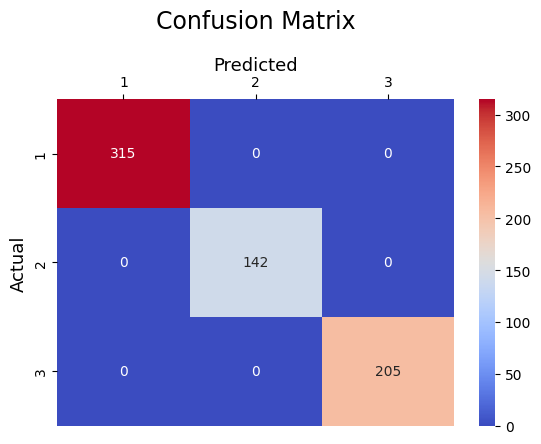

In [47]:
y_pred = model.predict(X_train)

print("\n")
print("Klasifikasi K-Nearest Neighbors menggunakan data train:\n")

labels_test = np.sort(y_train.unique())
cm = confusion_matrix(y_train, y_pred, labels=labels_test)
print("Confusion Matrix")
print(cm)

print("\n")
print("Accuracy:", accuracy_score(y_train, y_pred) * 100)
print("Precision:", precision_score(y_train, y_pred, average='macro') * 100)
print("Recall:", recall_score(y_train, y_pred, average='macro') * 100)
print("F1-Score:", f1_score(y_train, y_pred, average='macro') * 100)
print("\n")
print(classification_report(y_train, y_pred))

sns.heatmap(cm, annot=True, fmt="d", cmap='coolwarm', xticklabels=labels_test, yticklabels=labels_test)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top')
plt.ylabel('Actual', fontsize=13)
plt.xlabel('Predicted', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.show()

Menguji kinerja modelnya pake data test



Klasifikasi K-Nearest Neighbors menggunakan data test:

Confusion Matrix
[[38  0  0]
 [ 0 12  0]
 [ 0  0 24]]


Accuracy: 100.0
Precision: 100.0
Recall: 100.0
F1-Score: 100.0


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        38
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        24

    accuracy                           1.00        74
   macro avg       1.00      1.00      1.00        74
weighted avg       1.00      1.00      1.00        74



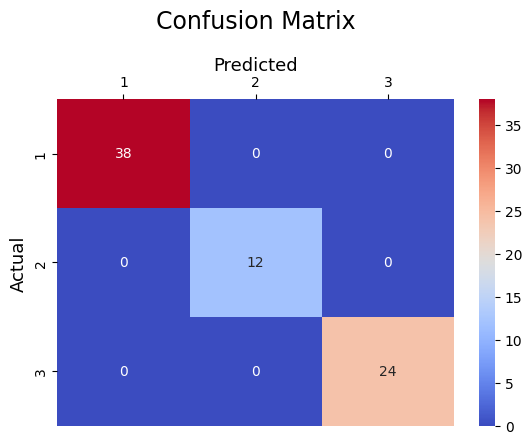

In [48]:
y_pred = model.predict(X_test)

print("\n")
print("Klasifikasi K-Nearest Neighbors menggunakan data test:\n")

labels_test = np.sort(y_test.unique())
cm = confusion_matrix(y_test, y_pred, labels=labels_test)
print("Confusion Matrix")
print(cm)

print("\n")
print("Accuracy:", accuracy_score(y_test, y_pred) * 100)
print("Precision:", precision_score(y_test, y_pred, average='macro') * 100)
print("Recall:", recall_score(y_test, y_pred, average='macro') * 100)
print("F1-Score:", f1_score(y_test, y_pred, average='macro') * 100)
print("\n")
print(classification_report(y_test, y_pred))

sns.heatmap(cm, annot=True, fmt="d", cmap='coolwarm', xticklabels=labels_test, yticklabels=labels_test)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top')
plt.ylabel('Actual', fontsize=13)
plt.xlabel('Predicted', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.show()

# Konversi

In [65]:
import pickle
file_pkl = r"..\model\pkl\model_knn.pkl"
pickle.dump(model, open(file_pkl, 'wb'))
loaded_model = pickle.load(open(file_pkl, 'rb'))
loaded_model

KNeighborsClassifier(n_neighbors=3)

In [64]:
import joblib
file_joblib = r"..\model\joblib\model_knn.joblib"
joblib.dump(model, file_joblib)
model_loaded = joblib.load(file_joblib)
model_loaded

KNeighborsClassifier(n_neighbors=3)

In [63]:
import json
file_json = r"..\model\json\model_knn.json"
params = model.get_params()
with open(file_json, 'w') as f:
    json.dump(params, f)